<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/04-Agrupamiento-kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento k-Means
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [14]:
# Paquetes necesarios
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np  # Operaciones matemáticas y arreglos
import matplotlib.pyplot as plt  # Visualización
import plotly.express as px # Para visualización interactiva
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs # Creación de datos de prueba
from sklearn.cluster import KMeans  # Algoritmo K-means
from sklearn.decomposition import PCA # Análisis de componentes principales

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

Como este proceso se realiza con los mismos datos que se tienen del ejercicio de agrupamiento jerárquico, se reutilizó el código del mismo:

,num_links,num_words,has_offer,sender_score,all_caps
0,3,98,1,0.718607,0
1,0,170,0,0.698901,1
2,0,38,0,0.620466,0
3,0,116,0,0.701755,0
4,3,89,1,0.583621,1
...,...,...,...,...,...
19995,1,22,1,0.614551,0
19996,3,154,0,1.000000,1
19997,4,109,0,0.935848,1
19998,2,197,0,0.481772,0


Esta es la cantida de NA que existe: 
 num_links       0
num_words       0
has_offer       0
sender_score    0
all_caps        0
dtype: int64


<Axes: >

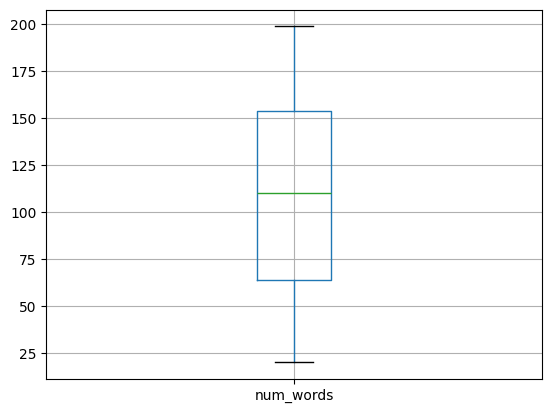

In [2]:
url = "https://raw.githubusercontent.com/Johnny-W-05/Aprendizaje-Automatico/main/dataset/spam_detection_dataset.csv"
df = pd.read_csv(url) #Cargamos los datos
df = df.drop(columns=['is_spam'])#Excluimos la variable objetivo is_spam
display(df) #Mostramos los datos
#Revisamos si existen na:
print("Esta es la cantida de NA que existe: \n", df.isna().sum())#No tiene NA´s
#Mostramos con estáadística descriptiva los datos
df.describe()
#Revisamos con una caja los datos que aparentan más desviación (num_words y num_links)
df.boxplot('num_words')

<Axes: >

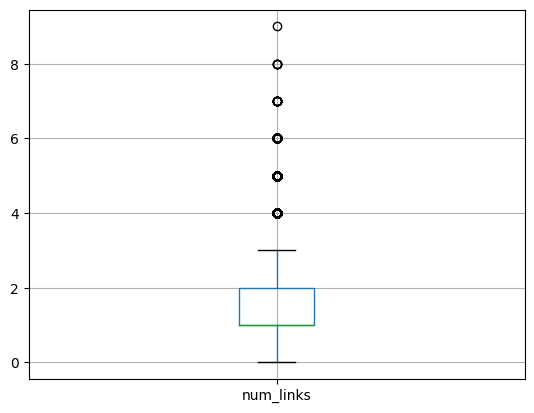

In [3]:
df.boxplot('num_links')
#Dado que el dataset podría depender de una mayor cantidad de links en un correo para detectarlo como spam no se tratarán estos outliers.

In [4]:
#No obstante, al ver que los datos poseen escalas distintas realizamos un escalado tipo standard scaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
#Esto con el objetivo de que los datos con mayor escala (num_words y un poco num_links) se ajusten en escala a los otros datos.
#También dado que k-means usa distancia euclidiana que podría dar más peso a datos con escalas distintas.

---
## <font color='264CC7'> Determinación del número de clusters </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de clústeres para un modelo K-Means utilizando el método del codo.
<ul>
  <li>Genera una gráfica que muestre la inercia frente al número de clústeres (k) en el rango de 1 a 10.</li>
  <li>Identifica visualmente el "codo" en la curva para seleccionar el número óptimo de clústeres.</li>
  <li>De manera intuitiva, explica por qué consideras ese punto como el codo y cómo influye en la calidad de los clústeres.</li>
</ul>
</div>


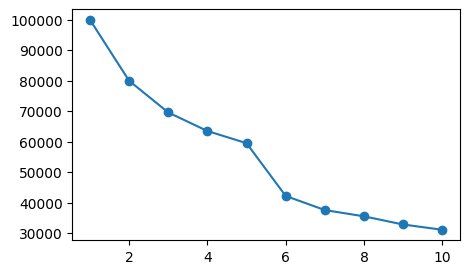

In [5]:
# Metodo del codo
inertia = []
for i in range(1, 11):
    modelo = KMeans(n_clusters=i, random_state=1) #Uso el último número de mi cedula como semilla
    modelo.fit(df_scaled)
    inertia.append(modelo.inertia_)
plt.figure(figsize=(5, 3))
plt.plot(range(1, 11), inertia, marker='o')

Con la gráfica podemos observar que el codo más notorio es en el valor de 6 clústeres. Esto porque antes de ello el valor de la gráfica mostraba resultados no tan decrecientes y al pasar a 6 clústers hubo un cambio drástico y de ahi otra vez cambio continuo. Es decir, para mí el "codo" es en el 6 y por ello elegiría esa cantidad.

---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

In [6]:
#Hacemos k-means para 6 clusters
modelo = KMeans(n_clusters=6, random_state=1)
modelo.fit(df_scaled)
#Asignamos cada grupo a los datos
df['cluster'] = modelo.labels_
#Sacamos la media, el mínimo y el máximo
print("\nMedia de cada cluster: \n", df.groupby('cluster').mean())
print("\nMínimo de cada cluster: \n", df.groupby('cluster').min())
print("\nMáximo de cada cluster: \n", df.groupby('cluster').max())


Media de cada cluster: 
          num_links   num_words  has_offer  sender_score  all_caps
cluster                                                          
0         1.412896  154.131222   1.000000      0.680811  0.000000
1         1.499233  109.642455   0.303325      0.703316  1.000000
2         1.038022   64.526596   0.000000      0.693948  0.000000
3         3.566045  109.609946   0.078866      0.691173  0.000389
4         1.330265   62.924818   1.000000      0.704227  0.000000
5         1.042056  154.458333   0.000000      0.694507  0.000000

Mínimo de cada cluster: 
          num_links  num_words  has_offer  sender_score  all_caps
cluster                                                         
0                0         99          1      0.000000         0
1                0         20          0      0.000000         1
2                0         20          0      0.060812         0
3                3         20          0      0.063391         0
4                0         20

In [7]:
#Mostramos 5 integrantes de cada cluster
for i in range(6):
  print("\nGrupo ", i)
  display(df[df['cluster'] == i].head(5))
  print("Cantidad total de integrantes: ", len(df[df['cluster'] == i]))



Grupo  0


,num_links,num_words,has_offer,sender_score,all_caps,cluster
6,0,166,1,1.000000,0,0
9,1,150,1,1.000000,0,0
10,1,143,1,0.617261,0,0
14,1,175,1,0.966764,0,0
17,2,128,1,0.709696,0,0


Cantidad total de integrantes:  2652

Grupo  1


,num_links,num_words,has_offer,sender_score,all_caps,cluster
1,0,170,0,0.698901,1,1
4,3,89,1,0.583621,1,1
12,2,86,1,1.000000,1,1
16,4,169,1,0.598964,1,1
22,6,125,0,0.594219,1,1


Cantidad total de integrantes:  1955

Grupo  2


,num_links,num_words,has_offer,sender_score,all_caps,cluster
2,0,38,0,0.620466,0,2
19,2,70,0,1.000000,0,2
26,2,27,0,0.961682,0,2
27,1,60,0,0.769625,0,2
29,1,78,0,0.554316,0,2


Cantidad total de integrantes:  5076

Grupo  3


,num_links,num_words,has_offer,sender_score,all_caps,cluster
37,3,180,0,0.706655,0,3
39,4,41,0,0.470356,0,3
48,5,130,0,0.591112,0,3
58,3,161,0,0.842124,0,3
76,3,151,0,0.740648,0,3


Cantidad total de integrantes:  2574

Grupo  4


,num_links,num_words,has_offer,sender_score,all_caps,cluster
0,3,98,1,0.718607,0,4
13,2,58,1,0.370009,0,4
21,1,100,1,0.839564,0,4
23,0,70,1,0.758474,0,4
24,0,47,1,0.623439,0,4


Cantidad total de integrantes:  2607

Grupo  5


,num_links,num_words,has_offer,sender_score,all_caps,cluster
3,0,116,0,0.701755,0,5
5,2,197,0,0.466201,0,5
7,0,113,0,0.600813,0,5
8,1,169,0,0.753108,0,5
11,1,152,0,0.792040,0,5


Cantidad total de integrantes:  5136


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

Viendo los promedios de las variables con sus valores máximos y mínimos, se puede apreciar que los grupos parecen tener rasgos distintivos pr el npumero de links, el si tienen o no oferta y el número de palabras. Con esto entonces los grupos serían:
* **Grupo 0**: número alto de palabras, moderado de links y todos tienen oferta (media 1). Por lo tanto se llamará "Lot Words-Some Links-Has Offer".
* **Grupo 1**: número moderado de palabras (de acuerdo a la media) y links y tiene poca oferta. Por tanto se llamará "Some Words-Some Links-Few Offer".
* **Grupo 2**: Número bajo de links (por máximo), palabras moderadas y ninguno tiene oferta (media 0). Por tanto se llamará "Some Words-Few Links-No Offer".
* **Grupo 3**: Número más alto de links (por mínimo y máximo), moderado de palabras (por media) y muy pocos poseen oferta (media < 0.1). Por tanto se llamará "Some Words-Lot Links-Few Offer".
* **Grupo 4**: Media más baja de palabras, moderado de links y todos tienen ofertas (media 1). Por tanto se llamará "Few Words-Some Links-Has Offer".
* **Grupo 5**: Número bajo de links (por Máximo), la media más alta en palabras y ninguno tiene ofertas (media 0). Por tanto, se llamará "Lot Words-Few Links-No Offer".

---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D seleccionando dos variables que creas relevantes.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
</ul>
</div>

In [8]:
#Realizamos uin gráfico de num_links y num_words diferenciado en clusters para ver los resultados
fig = px.scatter(df, x="num_links", y="num_words", color="cluster")
fig.show()

Dado que se eligió una variable discreta y otra continua, no se aprecia como en un scatterplot. No obstante si podemos ver patrones distintivos como que el grupo 0 y 5 y 2 estén en los números de link más bajos (incluso solo mostrándose el 0 y 5 arriba con mayores palabras que el 2) y 1 3 y 4 en los más altos (más el grupo 3). Esto viendo que la forma en que se les dio los nombres a los clusters fue realmente buena y también haber elegido estas dos variables fue una buena opción. No obstante si es notorio un solapamiento de clusters y sobre todo no es una distinción muy remarcada (por ejemplo desde num_links > 3 los grupos 3 y 1 se combinan y no se percibe un grupo como tal)

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D usando reducción de dimensionalidad diferente a PCA.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

In [10]:
#Ahora reciclamos el código que vimos en el notebook de agrupamiento por kmeans y lo ajustamos:
# Realizo un PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# Crear un DataFrame para graficar fácilmente
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = df['cluster'].values

# Crear el scatterplot interactivo con Plotly Express
fig = px.scatter(
    df_pca,
    x='PC1',
    y='PC2',
    color='cluster',
    hover_data=['cluster'],
)

# Personalizar apariencia
fig.update_traces(marker=dict(opacity=0.8))
fig.update_layout(
    title='Clústeres visualizados en 2D (PCA)',
    width=800,
    height=600,
)

fig.show()

In [13]:
#Porcentaje de varianza
print("Porcentajes por componente:",pca.explained_variance_ratio_)
#Total
print("Total:", pca.explained_variance_ratio_.sum())

Porcentajes por componente: [0.20334209 0.20167024]
Total: 0.4050123276334492


Los grupos parecen tener una buena cohesión (parece que los puntos si están bien agrupados entre sus mismos datos) pero la separación de grupos es un serio problema (literalmente se nota al grupo 2 encima del grupo 0), por lo que para clusterizado que necesite datos cohesionados es un buen grupo, mas no separa bien entre grupos. Igualmente como en el caso de agrupamiento jerárquico, al usar el mismo dataset vemos que las dos componentes solo acaparan el 40,5% de los datos y esto para una visualización es a consideración suficiente pero no lo es si el objetivo era justamente reducir dimensiones. En este sentido en un gráfico 3D podría solventarse el tema de la separación pero esto último es mera intuición.

---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [15]:
#Calculamos Silueta para los grupos
print("Silueta: ", silhouette_score(df_scaled, df['cluster']))

Silueta:  0.26313955539225575


Con una métrica de Silueta de 0,26 vemos que los grupos no tienen buena división. Esto ya que un valor cercano a 0 podría indicar justamente lo que en realidad sucede que es solapamiento de grupos, haciendo de estos grupos no aptos para distinción entre ellos. No obstante no es un valor tan pequeño como por ejemplo el que nos dió al inicio con agrupamiento jerárquico (otro deber), entonces diremos que en parte se debe a la buena cohesión que se logró.